In [1]:
import pandas as pd 
import re
import string
import spacy

In [2]:
df=pd.read_csv("Elon_musk.csv",encoding='latin_1')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
def cleanText(text):
    text=re.sub(r'@[A-za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

In [6]:
df['Text']=df['Text'].apply(cleanText)

In [7]:
df

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is next-lev...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [8]:
#removing punctuation
def remove_punc(txt):
    text=''.join([x for x in txt if x not in string.punctuation])
    return text

In [9]:
df['Text']=df["Text"].apply(remove_punc)

In [10]:
df

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is nextleve...
2,Great interview
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,True it sounds so surreal but the negative pr...
1995,Make sure to read ur terms amp conditions bef...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is U0001F525U0001F525


In [11]:
df = [Text.strip() for Text in df["Text"]] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df


['I\x92m an alien',
 'Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it',
 'Great interview',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year Now on to the next for even more',
 'Happy New Year of the Ox',
 'Frodo was the underdoge\nAll thought he would fail\nHimself most of all',
 'Haha thanks',
 'Indeed Tweets definitely do not represent realworld time allocation',
 'The most entertaining outcome is the most likely',
 'Just sent some',
 'Just agree to do Clubhouse with',
 'It\x92s getting real',
 'Bought some Dogecoin for lil X so he can be a toddler hodler',
 'He definitely has issues but the sentencing seems a bit high',
 'Thanks for fixing',
 'Please unlock my account',
 'U0001F923U0001F923',
 'This is true power haha',
 'Any crypto wallet that won\x92t give you your private keys should be avoided at all costs',
 'Your app sucks',
 'NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together 

In [12]:
text = ' '.join(df)
text

'I\x92m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge\nAll thought he would fail\nHimself most of all Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well Starlink will IPO St

In [13]:
#tokenizing and normalizing
def tokenize(txt):
    tokens=re.split('\W+',txt)
    return tokens

In [14]:
tokens=tokenize(text.lower())

In [15]:
tokens[:10]

['i', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr']

In [16]:
#removing the stop words
import nltk
stopwords=nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
def remove_stpwords(txt):
    words=[word for word in txt if word not in stopwords]
    return words

In [18]:
words=remove_stpwords(tokens)

In [19]:
words[:10]

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried',
 'great',
 'interview',
 'doge']

In [20]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemm(tokens):
    stemmed_tokens = [ps.stem(word) for word in tokens]
    return stemmed_tokens



In [21]:
words=stemm(words)

In [22]:
words[:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tri',
 'great',
 'interview',
 'doge']

In [23]:
nlp = spacy.load('en_core_web_sm') 
doc = nlp(' '.join(words))
print(doc[0:40])

alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdog thought would fail haha thank inde tweet definit repres realworld time alloc entertain outcom


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo']


In [25]:
text=" ".join(lemmas)


In [26]:
text

'alien ray trace cyberpunk hdr nextlevel tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdog thought would fail haha thank inde tweet definit repre realworld time alloc entertain outcom like send agre clubhous get real buy dogecoin lil x toddler hodler definit issu sentenc seem bit high thank fix plea unlock account u0001f923u0001f923 true power haha crypto wallet give privat key avoid cost app suck nasa select falcon heavi launch first two element lunar gateway togeth one mission ye predict cash flow reason well starlink ipo starlink staggeringli difficult technic amp econom endeavor howev spacex need pass deep chasm neg cash flow next year low cost per ton carbon sequ net valu product make must scalabl g meant price countri differ tax amp ship intend earth may idea appli mar u0001f923u0001f923 xprize team manag 100 m carbon captur prize everyon tesla receiv stock comp stockopt take tabl miss back work go seem bit 

In [27]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

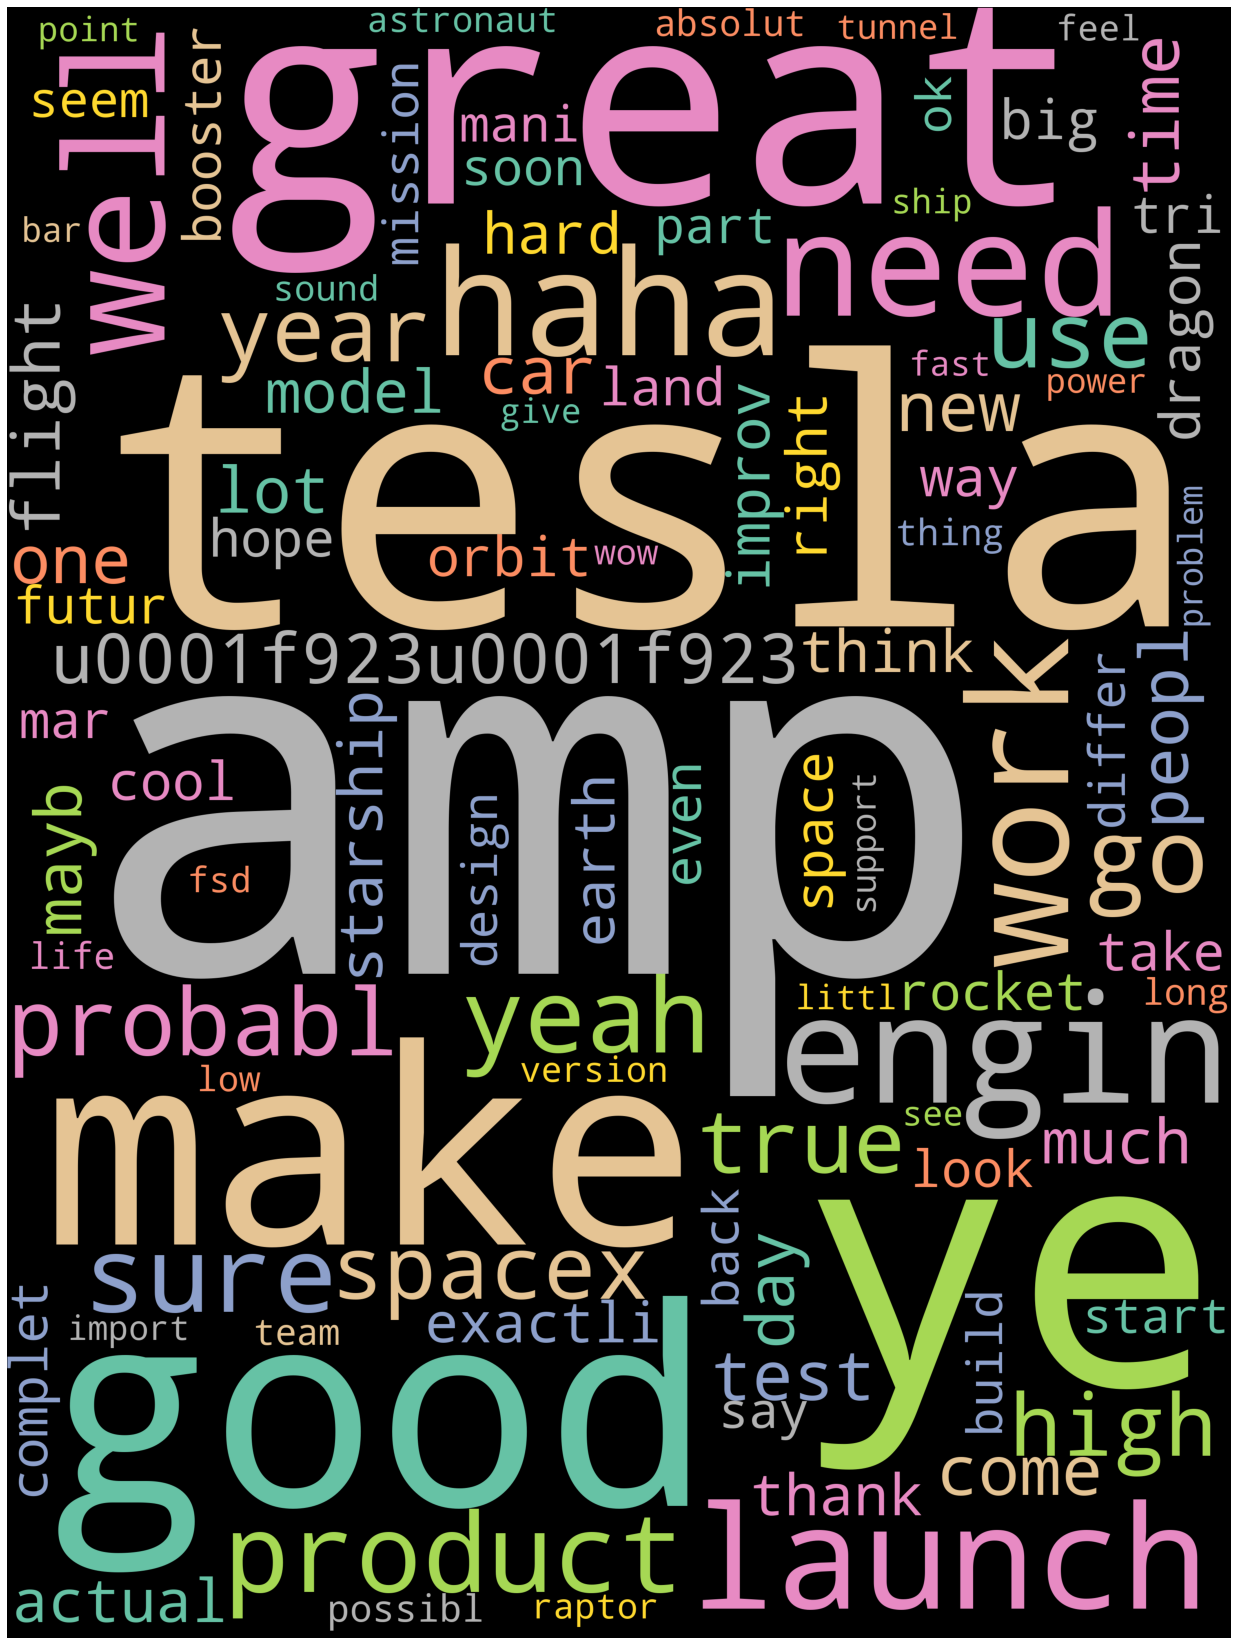

In [28]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 4000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [29]:
with open("positive-words.txt","r") as pw:
    pwds = pw.read().split("\n")
pwds = pwds[35:]


In [30]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    nwds = nw.read().split("\n")
nwds = nwds[35:]


In [32]:
pos_text = ' '.join([word for word in lemmas if word in pwds])
wc_pos = WordCloud(background_color='black',width=1800,height=1400).generate(pos_text)

In [33]:
neg_text = ' '.join([word for word in lemmas if word in nwds])
wc_neg = WordCloud(background_color='black',width=1800,height=1400).generate(neg_text)

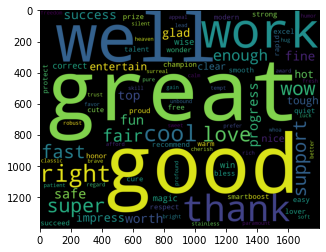

In [34]:
plt.imshow(wc_pos)

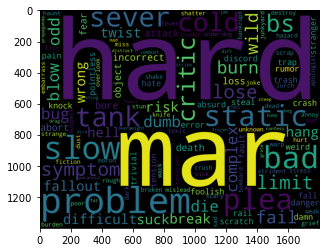

In [35]:
plt.imshow(wc_neg)